## Estado actual de los datos

In [2]:
# importamos la librería pandas, seaborn y matplotlib para la manipulación y visualización del dataset
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
# almacenamos nuestros datos (vienen en formato csv) en un dataframe y los mostramos
df = pd.read_csv('./data/student-por.csv')

df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

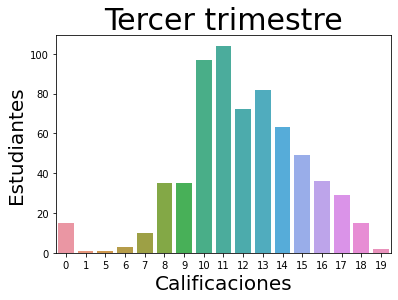

In [4]:
# visualización de los datos con matplotlib y seaborn
b=sns.countplot(df['G3']) # cuenta el número de estudiantes
b.axes.set_title('Tercer trimestre',fontsize=30) # título
b.set_xlabel('Calificaciones',fontsize=20) # eje x
b.set_ylabel('Estudiantes',fontsize=20)# eje y
plt.show

In [5]:
df.columns # devuelve todas las columnas (atributos) del conjunto de datos

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [6]:
df.shape # devuelve el número de filas y columnas del conjunto de datos

(649, 33)

## Limpieza de datos

In [7]:
# este bloque de código se utiliza para comprobar los valores que faltan en nuestro conjunto de datos por columna,
# es decir, si no hay ningún valor nulo en ninguna columna nos encontramos con que no hay valores nulos
# en nuestro conjunto de datos
df.isnull().any()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

In [8]:
# también podemos averiguar cuántos valores nulos tenemos en nuestro conjunto de datos mediante el siguiente código
df.isnull().sum() 
# esto da el número total de valores nulos por columna en nuestro conjunto de datos
# la suma del número de valores nulos para cada columna en cero, lo que significa que no hay ninguno

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [9]:
# eliminar las columnas de datos que son irrelevantes para la calificación de los estudiantes
# o no afecta a la calificación de los estudiantes en nuestro modelo
df.drop(["health", "Mjob", "Fjob", "nursery", "absences", "Walc", "higher", "failures", "freetime", 'school', 'age', 'Pstatus', "goout", "Dalc", "famrel", "guardian", "reason", "traveltime", "romantic", "schoolsup"],axis=1,inplace=True)
df.columns

Index(['sex', 'address', 'famsize', 'Medu', 'Fedu', 'studytime', 'famsup',
       'paid', 'activities', 'internet', 'G1', 'G2', 'G3'],
      dtype='object')

## Construcción del modelo / Codificación

In [10]:
# mapeo para asegurar que tenemos datos binarios para trabajar
# con nuestro modelo porque no podemos usar datos de cadena (string)
# para el aprendizaje automático
# para ello usaremos la función .map
# mapeo valores yes / no en el dataset:
d = {'yes':1,'no':0}
df['famsup']=df['famsup'].map(d)
df['paid']=df['paid'].map(d)
df['activities']=df['activities'].map(d)
df['internet']=df['internet'].map(d)
# mapeo valores F / M en el dataset:
d={'F':1,'M':0}
df['sex']=df['sex'].map(d)
# mapeo valores R / U en el dataset:
d={'R':0,'U':1}
df['address']=df['address'].map(d)
# mapeo valores LE3 / GT3 en el dataset:
d={'LE3':0,'GT3':1}
df['famsize']=df['famsize'].map(d)

In [11]:
# visualizamos cómo ha quedado nuestro dataframe con los nuevos mapeos
df.head()

,sex,address,famsize,Medu,Fedu,studytime,famsup,paid,activities,internet,G1,G2,G3
0,1,1,1,4,4,2,0,0,0,0,0,11,11
1,1,1,1,1,1,2,1,0,0,1,9,11,11
2,1,1,0,1,1,2,0,0,0,1,12,13,12
3,1,1,1,4,2,3,1,0,1,1,14,14,14
4,1,1,1,3,3,2,1,0,0,0,11,13,13


In [12]:
# mapeo de los valores de las tres columnas finales del dataset (G1, G2, G3) en 0 (suspenso) y 1 (aprobado)
# en el dataset las calificaciones van del 0 al 20, por lo que el 10 marca el límite del aprobado
d = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0, 10:1, 11:1, 12:1, 13:1, 14:1, 15:1, 16:1, 17:1, 18:1, 19:1, 20:1}
df['G1']=df['G1'].map(d)
df['G2']=df['G2'].map(d)
df['G3']=df['G3'].map(d)

In [13]:
# visualizamos cómo ha quedado nuestro dataframe con los nuevos mapeos
df.head()

,sex,address,famsize,Medu,Fedu,studytime,famsup,paid,activities,internet,G1,G2,G3
0,1,1,1,4,4,2,0,0,0,0,0,1,1
1,1,1,1,1,1,2,1,0,0,1,0,1,1
2,1,1,0,1,1,2,0,0,0,1,1,1,1
3,1,1,1,4,2,3,1,0,1,1,1,1,1
4,1,1,1,3,3,2,1,0,0,0,1,1,1


In [14]:
# visualizamos que todos los valores que poseemos son números enteros
df.dtypes

sex           int64
address       int64
famsize       int64
Medu          int64
Fedu          int64
studytime     int64
famsup        int64
paid          int64
activities    int64
internet      int64
G1            int64
G2            int64
G3            int64
dtype: object

## Tratamiento del dataset

In [15]:
dataset = df.values
dataset

array([[1, 1, 1, ..., 0, 1, 1],
       [1, 1, 1, ..., 0, 1, 1],
       [1, 1, 0, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 0],
       [0, 1, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]])

In [16]:
# dividimos nuestro conjunto de datos en X (12 primeras columnas) y lo que deseamos predecir Y (última columna)
X = dataset[:,0:12]
Y = dataset[:,12]

In [17]:
# utilizamos la función MinMaxScaler para que todos los valores se encuentren entre 0 y 1 inclusive
# en pos de facilitar el trabajo a nuestra red neuronal gracias a que le introducimos valores muy similares
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[1., 1., 1., ..., 0., 0., 1.],
       [1., 1., 1., ..., 1., 0., 1.],
       [1., 1., 0., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 0., 1., 1.],
       [0., 1., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.]])

In [18]:
# dividimos nuestros datos en un conjunto de entrenamiento, un conjunto de validación y un conjunto de prueba
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)
# el conjunto de entrenamiento tiene 1022 datos, mientras que el conjunto de validación 
# y prueba tiene 219 datos cada uno. Las variables X tienen 12 entradas, 
# mientras que las variables Y sólo tienen una entrada para predecir.

(454, 12) (97, 12) (98, 12) (454,) (97,) (98,)


## Construir y entrenar nuestra primera red neuronal

### Configuración de la arquitectura

In [149]:
from keras.models import Sequential
from keras.layers import Dense

In [452]:
# almacenamos nuestro modelo en la variable 'model' y lo describimos secuencialmente (capa por capa) entre corchetes
model = Sequential([
    Dense(8, activation='relu', input_shape=(12,)),
    # primera capa densa con 8 neuronas, activación ReLU y las columnas de entrada son 12
    Dense(8, activation='relu'),
    # segunda capa densa con 8 neuronas y activación ReLU
    Dense(1, activation='sigmoid'),
    # tercera capa densa con 1 neurona y de activación sigmoid
])

### Probar con los mejores números para crear nuestra red neuronal

In [453]:
model.compile(optimizer='sgd',
              # sgd se refiere al descenso de gradiente
              loss='binary_crossentropy',
              # función de pérdida para las salidas que toman los valores 1 o 0 se llama entropía cruzada binaria
              metrics=['accuracy'])
              # seguimiento de la precisión sobre la función de pérdida

In [454]:
hist = model.fit(X_train, Y_train,
          batch_size=8, epochs=100,
          # especificamos el tamaño del batch size y el tiempo que queremos entrenar (épocas)
          validation_data=(X_val, Y_val))
          # especificamos cuáles son nuestros datos de validación para que el modelo nos diga cómo lo estamos haciendo en cada punto
# dará como resultado un historial, que guardamos bajo la variable hist
# utilizaremos esta variable un poco más tarde cuando lleguemos a la visualización

Epoch 1/100
57/57 [==============================] - 1s 5ms/step - loss: 0.4476 - accuracy: 0.8436 - val_loss: 0.3457 - val_accuracy: 0.8866
Epoch 2/100
57/57 [==============================] - 0s 3ms/step - loss: 0.3980 - accuracy: 0.8436 - val_loss: 0.3184 - val_accuracy: 0.8866
Epoch 3/100
57/57 [==============================] - 0s 2ms/step - loss: 0.3701 - accuracy: 0.8436 - val_loss: 0.3004 - val_accuracy: 0.8866
Epoch 4/100
57/57 [==============================] - 0s 2ms/step - loss: 0.3486 - accuracy: 0.8436 - val_loss: 0.2874 - val_accuracy: 0.8866
Epoch 5/100
57/57 [==============================] - 0s 3ms/step - loss: 0.3301 - accuracy: 0.8436 - val_loss: 0.2748 - val_accuracy: 0.8866
Epoch 6/100
57/57 [==============================] - 0s 3ms/step - loss: 0.3134 - accuracy: 0.8436 - val_loss: 0.2641 - val_accuracy: 0.8866
Epoch 7/100
57/57 [==============================] - 0s 3ms/step - loss: 0.2985 - accuracy: 0.8436 - val_loss: 0.2527 - val_accuracy: 0.8866
Epoch 8/100
5

In [455]:
model.evaluate(X_test, Y_test)[1]

4/4 [==============================] - 0s 3ms/step - loss: 0.3198 - accuracy: 0.8980


0.8979591727256775

In [456]:
predictors = ['sex', 'address', 'famsize', 'Medu', 'Fedu', 'studytime', 'famsup', 'paid', 'activities', 'internet', 'G1','G2']
X = df[predictors]
y = df['G3']

In [510]:
model.predict(X)

array([[0.9432467 ],
       [0.9352509 ],
       [0.9940425 ],
       [0.9987559 ],
       [0.9961523 ],
       [0.99170315],
       [0.98740345],
       [0.9961369 ],
       [0.98610175],
       [0.99526983],
       [0.9973175 ],
       [0.99882615],
       [0.9939592 ],
       [0.9947039 ],
       [0.9958546 ],
       [0.9973238 ],
       [0.99832714],
       [0.9976052 ],
       [0.34079993],
       [0.9939439 ],
       [0.9960871 ],
       [0.99629796],
       [0.99430156],
       [0.98956037],
       [0.9971577 ],
       [0.9974072 ],
       [0.9936917 ],
       [0.9965973 ],
       [0.99521655],
       [0.9976096 ],
       [0.99615943],
       [0.996042  ],
       [0.9960804 ],
       [0.9926527 ],
       [0.9946705 ],
       [0.99714375],
       [0.9916836 ],
       [0.9952858 ],
       [0.9976225 ],
       [0.9971715 ],
       [0.9955802 ],
       [0.9896115 ],
       [0.996042  ],
       [0.8670814 ],
       [0.9963566 ],
       [0.9978821 ],
       [0.9931123 ],
       [0.997

In [556]:
new_X = [[0, 0, 0, 4, 4, 3, 1, 1, 0, 1, 0, 1]]
print(model.predict(new_X))

[[0.80269194]]


## Visualización pérdida y precisión del modelo

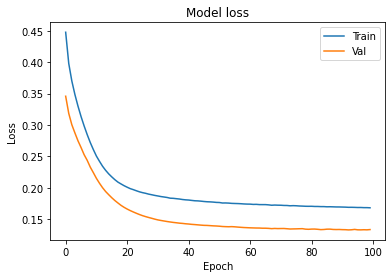

In [512]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

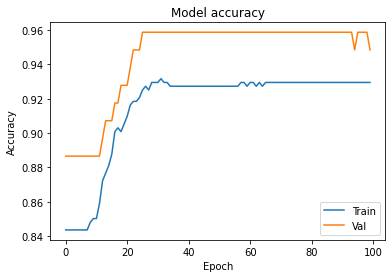

In [513]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

## Regularización modelo

In [515]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(12,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=8, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
57/57 [==============================] - 4s 50ms/step - loss: 0.3049 - accuracy: 0.8612 - val_loss: 0.2109 - val_accuracy: 0.9691
Epoch 2/100
57/57 [==============================] - 2s 29ms/step - loss: 0.2132 - accuracy: 0.9141 - val_loss: 0.2106 - val_accuracy: 0.9485
Epoch 3/100
57/57 [==============================] - 2s 30ms/step - loss: 0.1997 - accuracy: 0.9185 - val_loss: 0.1453 - val_accuracy: 0.9381
Epoch 4/100
57/57 [==============================] - 2s 30ms/step - loss: 0.1637 - accuracy: 0.9317 - val_loss: 0.1396 - val_accuracy: 0.9588
Epoch 5/100
57/57 [==============================] - 2s 30ms/step - loss: 0.1578 - accuracy: 0.9317 - val_loss: 0.1353 - val_accuracy: 0.9588
Epoch 6/100
57/57 [==============================] - 2s 30ms/step - loss: 0.1538 - accuracy: 0.9251 - val_loss: 0.1407 - val_accuracy: 0.9588
Epoch 7/100
57/57 [==============================] - 2s 30ms/step - loss: 0.1401 - accuracy: 0.9361 - val_loss: 0.1636 - val_accuracy: 0.9485
Epoch 

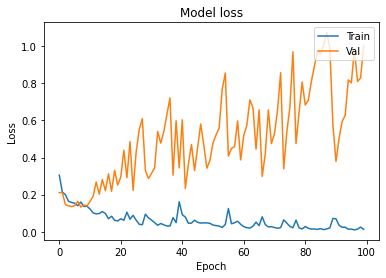

In [516]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

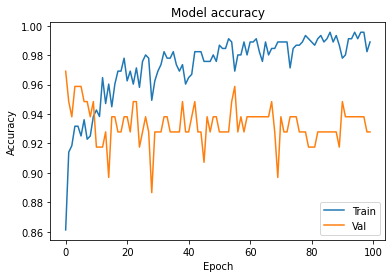

In [517]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [518]:
model_2.evaluate(X_test, Y_test)[1]

4/4 [==============================] - 0s 9ms/step - loss: 3.4267 - accuracy: 0.8469


0.8469387888908386

In [519]:
from keras.layers import Dropout
from keras import regularizers

In [520]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(12,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [521]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=8, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
57/57 [==============================] - 4s 48ms/step - loss: 9.4471 - accuracy: 0.8480 - val_loss: 0.9200 - val_accuracy: 0.9175
Epoch 2/100
57/57 [==============================] - 2s 42ms/step - loss: 0.5372 - accuracy: 0.9053 - val_loss: 0.3141 - val_accuracy: 0.9588
Epoch 3/100
57/57 [==============================] - 2s 42ms/step - loss: 0.3481 - accuracy: 0.9229 - val_loss: 0.2741 - val_accuracy: 0.9588
Epoch 4/100
57/57 [==============================] - 2s 43ms/step - loss: 0.3224 - accuracy: 0.9207 - val_loss: 0.2715 - val_accuracy: 0.9175
Epoch 5/100
57/57 [==============================] - 2s 43ms/step - loss: 0.3158 - accuracy: 0.9207 - val_loss: 0.2450 - val_accuracy: 0.9588
Epoch 6/100
57/57 [==============================] - 2s 42ms/step - loss: 0.3111 - accuracy: 0.9229 - val_loss: 0.2507 - val_accuracy: 0.9381
Epoch 7/100
57/57 [==============================] - 2s 43ms/step - loss: 0.3012 - accuracy: 0.9229 - val_loss: 0.3107 - val_accuracy: 0.9381
Epoch 

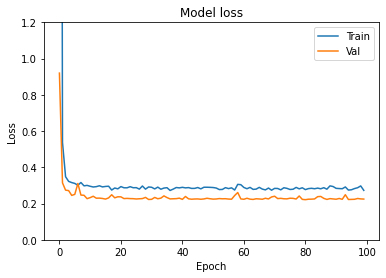

In [522]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

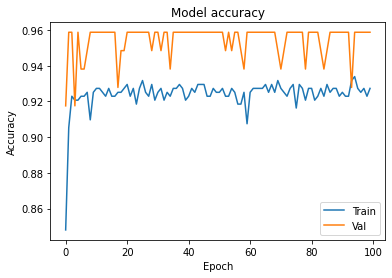

In [523]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [524]:
model_3.evaluate(X_test, Y_test)[1]

4/4 [==============================] - 0s 14ms/step - loss: 0.3774 - accuracy: 0.8980


0.8979591727256775